# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(19*'🐶' + homeo_method + 10*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## theory



In [4]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

In [5]:
print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
print('activation vector', np.count_nonzero(sparse_code_binary, axis=0))

Sum of non-zero coefficients 102635 ~= 102400
average non-zeros 232.73242630385488 ~= 232.19954648526078
activation vector [228 221 247 229 242 215 253 215 231 244 238 221 227 212 264 248 228 245
 241 238 210 233 198 242 231 230 249 226 223 228 231 203 224 219 224 246
 236 231 224 256 206 243 204 243 217 205 225 256 192 245 247 237 225 241
 243 224 254 208 220 241 228 239 209 242 245 217 228 232 239 242 235 234
 249 238 244 218 242 257 234 237 244 219 233 251 230 215 242 240 239 254
 216 243 218 235 234 269 248 195 242 203 229 228 225 236 242 218 244 235
 221 235 238 220 252 214 239 204 242 227 213 202 257 233 230 229 243 205
 226 253 238 204 227 260 230 226 247 241 233 248 217 217 237 261 227 218
 228 237 239 226 254 254 224 246 259 246 247 266 223 249 229 236 251 255
 226 249 238 236 234 239 242 235 233 230 206 249 238 229 228 226 240 225
 221 244 227 221 217 198 228 237 235 219 249 225 217 244 257 249 233 226
 230 225 242 246 237 235 240 237 233 232 252 226 222 210 229 229 245 253
 

Shape of co-occurrences (4096, 441, 441)
activation vector [[228  20  17 ...  14  11  17]
 [ 20 221  14 ...  14  15  11]
 [ 17  14 247 ...  16  13  13]
 ...
 [ 14  14  16 ... 237  13  13]
 [ 11  15  13 ...  13 198  11]
 [ 17  11  13 ...  13  11 234]]
marginal activation vector [13.5714 13.1134 14.4626 13.5034 14.0703 12.8095 15.0952 12.6349 13.4467
 14.2245 14.0045 13.0522 13.3152 12.6508 15.5533 14.7483 13.5397 14.8209
 14.0884 13.8118 12.4399 13.6735 11.5646 14.254  13.4512 13.3447 14.4671
 13.4195 12.9229 13.6803 13.4943 11.898  12.9546 13.0499 13.2902 14.3968
 14.0884 13.8005 13.1066 14.8776 12.4399 14.2381 12.0952 14.4444 12.9002
 11.9456 13.3946 15.1383 11.322  14.2404 14.6916 14.0771 13.0045 14.3469
 14.5147 13.1111 14.9524 12.195  12.8118 14.2018 13.2744 14.0159 12.2132
 14.0794 14.4036 12.7392 13.3084 13.5556 14.0907 14.2812 13.6417 13.7234
 14.6009 13.9637 14.3152 12.9274 14.4603 15.1587 13.7574 13.9615 14.2313
 12.839  13.6893 14.8095 13.6168 12.9456 14.0272 14.3152 13.8254 

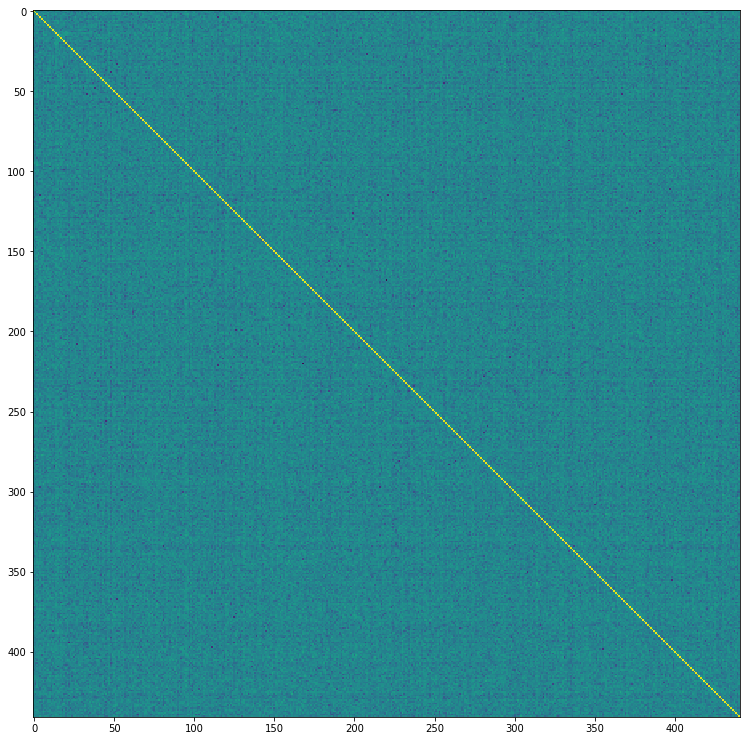

In [6]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
print('Shape of co-occurrences', b_ij.shape)
print('activation vector', np.count_nonzero(b_ij, axis=0))
fig, ax= plt.subplots(figsize=(13, 13))
ax.imshow(np.log(np.count_nonzero(b_ij, axis=0)));
print('marginal activation vector', np.count_nonzero(b_ij, axis=0).mean(axis=-1))

Min-Max -2.3899497939920334e-06 0.00027524774268567067


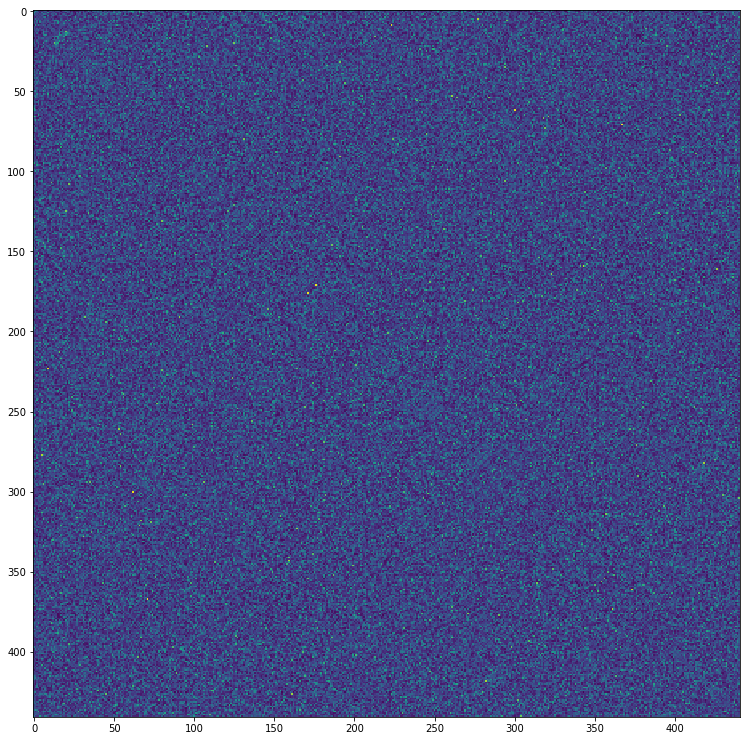

In [7]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
P_ij = 1.*np.count_nonzero(b_ij, axis=0)
P_ij /= P_ij.sum()
P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
P_i /= P_i.sum()
fig, ax= plt.subplots(figsize=(13, 13))
MI_ = - (P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  ))
MI_[P_ij==0] = 0
MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
print('Min-Max', MI_.min(), MI_.max())
np.fill_diagonal(MI_, 0)
ax.imshow(MI_);

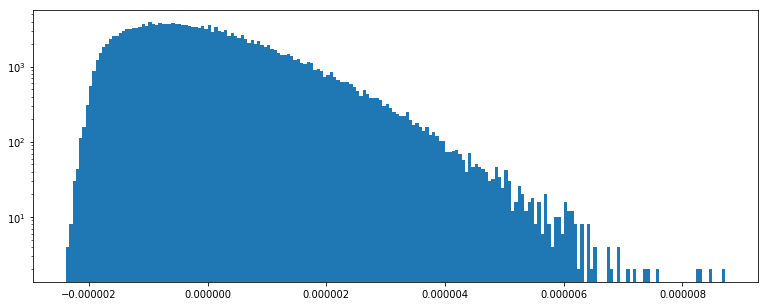

In [8]:
fig, ax= plt.subplots(figsize=(13, 5))
ax.hist(MI_.ravel(), bins=200)
ax.set_yscale('log');

In [9]:
from shl_scripts.shl_tools import get_MI
MI_theory = []
for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    MI = get_MI(sparse_code_binary)
    print ('Mutual information for random sample=', MI)
    MI_theory.append(MI)
MI_theory = np.array(MI_theory)

Mutual information for random sample= 0.10744278085136257
Mutual information for random sample= 0.10581919588928859
Mutual information for random sample= 0.10687309912751114
Mutual information for random sample= 0.10489001908840498
Mutual information for random sample= 0.10699514556493693
Mutual information for random sample= 0.1072856433804251
Mutual information for random sample= 0.1062034861252231
Mutual information for random sample= 0.10537910387462497
Mutual information for random sample= 0.10713195012755986
Mutual information for random sample= 0.1074999654694624


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [10]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, 
#                                              P_cum=dico[homeo_method].P_cum, gain=None, 
                                              P_cum=None, gain=np.ones(shl.n_dictionary),

                                              l0_sparseness = shl.l0_sparseness, C=shl.C)
    # from shl_scripts.shl_tools import print_stats
    # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## measuring the distance to independance 

In [11]:
print ('Mutual information for theory=', MI_theory.mean(), '+/-', MI_theory.std())
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    MI = get_MI(sparse_code[homeo_method])
    print ('Mutual information for homeo_method=', homeo_method, 'is', MI)

Mutual information for theory= 0.10655203894987997 +/- 0.000875357989613382
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= None is 0.1309661097721667
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= HAP is 0.13101375579775726
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= HEH is 0.12999837508162965


## Version used

In [12]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
pandas 0.22.0
Fri May 11 13:23:12 2018 CEST